# Daten importieren

In [ ]:
import pandas as pd

df = pd.read_csv("store_product_data_3.csv", parse_dates=["Date"], index_col="Date")
df = df.asfreq('D')
df

,number_sold
Date,
2023-10-19,0
2023-10-20,0
2023-10-21,0
2023-10-22,0
2023-10-23,0
...,...
2024-03-14,0
2024-03-15,0
2024-03-16,0


# Daten visualisieren

<Axes: xlabel='Date', ylabel='number_sold'>

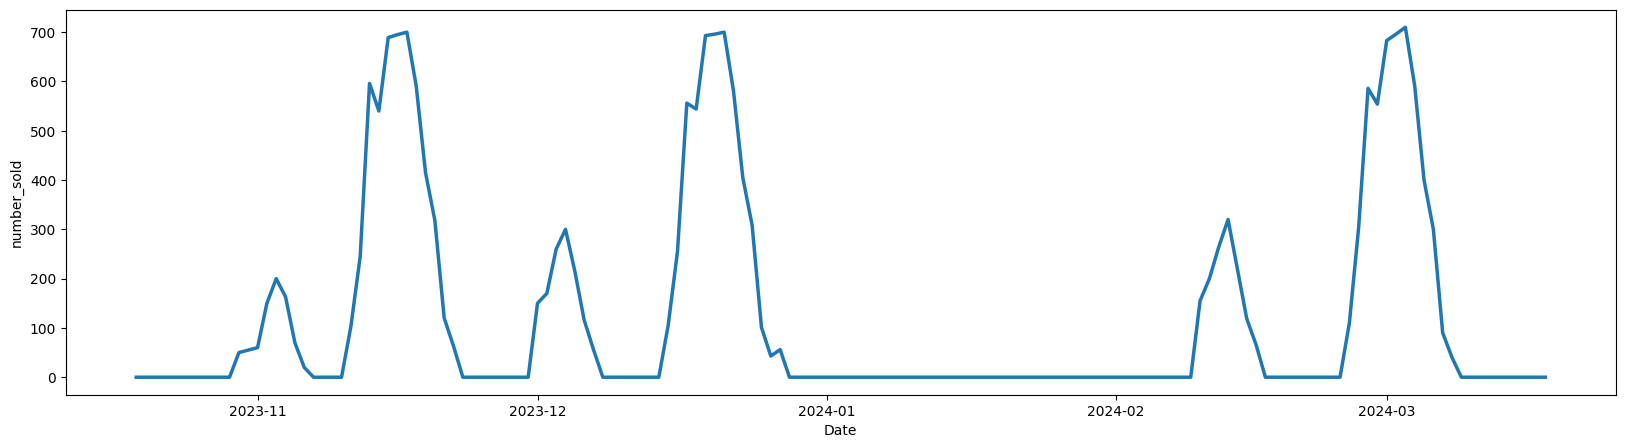

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
sns.lineplot(x=df.index, y=df["number_sold"], linewidth=2.5)

# Lag-Features

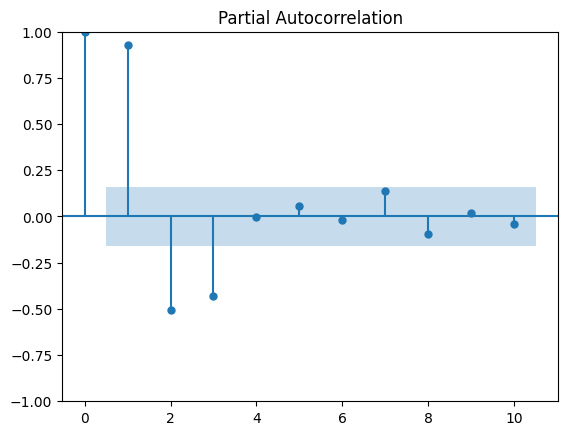

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df["number_sold"], lags=10)
plt.show()

In [15]:
y = df["number_sold"]
X = pd.DataFrame({
    'lag_3': y.shift(3),
    'lag_2': y.shift(2),
    'lag_1': y.shift(1)
}).fillna(0)

In [16]:
X

,lag_3,lag_2,lag_1
Date,,,
2023-10-19,0.0,0.0,0.0
2023-10-20,0.0,0.0,0.0
2023-10-21,0.0,0.0,0.0
2023-10-22,0.0,0.0,0.0
2023-10-23,0.0,0.0,0.0
...,...,...,...
2024-03-14,0.0,0.0,0.0
2024-03-15,0.0,0.0,0.0
2024-03-16,0.0,0.0,0.0


# Daten aufteilen

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

In [20]:
X_train

,lag_3,lag_2,lag_1
Date,,,
2023-10-19,0.0,0.0,0.0
2023-10-20,0.0,0.0,0.0
2023-10-21,0.0,0.0,0.0
2023-10-22,0.0,0.0,0.0
2023-10-23,0.0,0.0,0.0
...,...,...,...
2024-02-12,0.0,155.0,200.0
2024-02-13,155.0,200.0,264.0
2024-02-14,200.0,264.0,320.0


In [21]:
X_test

,lag_3,lag_2,lag_1
Date,,,
2024-02-17,219.0,119.0,66.0
2024-02-18,119.0,66.0,0.0
2024-02-19,66.0,0.0,0.0
2024-02-20,0.0,0.0,0.0
2024-02-21,0.0,0.0,0.0
2024-02-22,0.0,0.0,0.0
2024-02-23,0.0,0.0,0.0
2024-02-24,0.0,0.0,0.0
2024-02-25,0.0,0.0,0.0


# Modell trainieren

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Modell visualisieren

In [25]:
train_predictions = model.predict(X_train)

<Axes: xlabel='Date', ylabel='number_sold'>

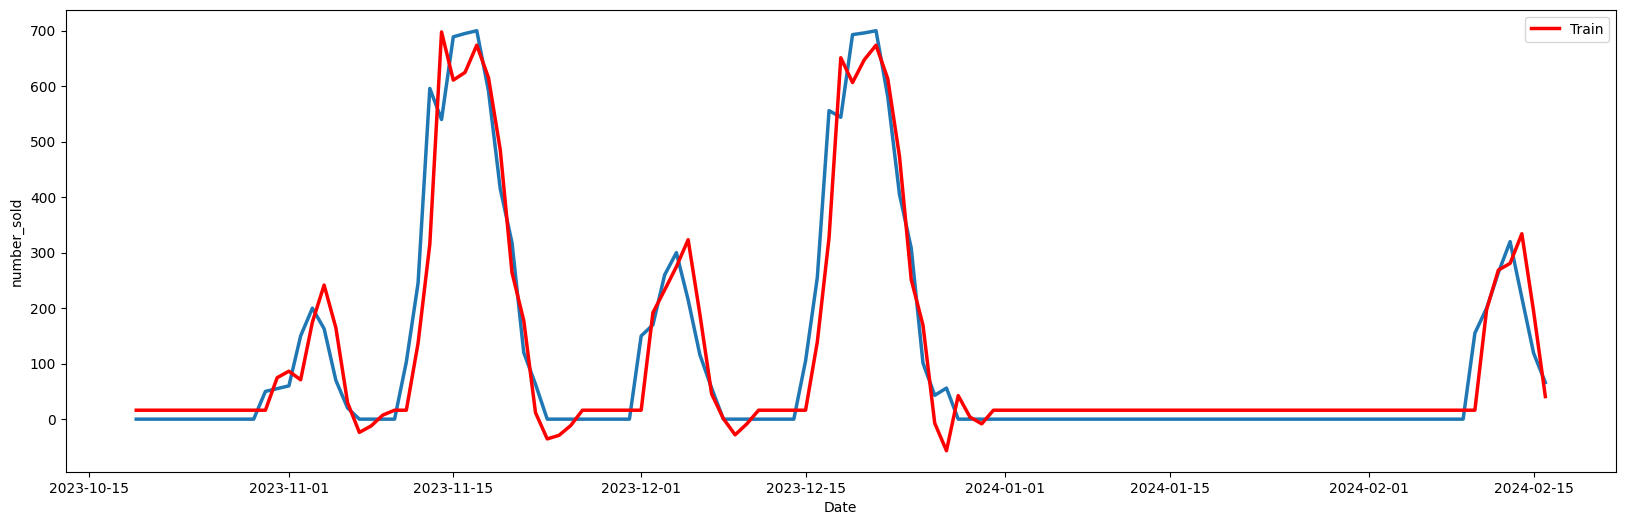

In [26]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=X_train.index, y=y_train, linewidth=2.5)
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")

# Vorhersage auf den Testdaten

In [27]:
test_predictions = model.predict(X_test)

# Modellbewertung

In [28]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_predictions, y_test)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 46.23428249195544


<Axes: xlabel='Date', ylabel='number_sold'>

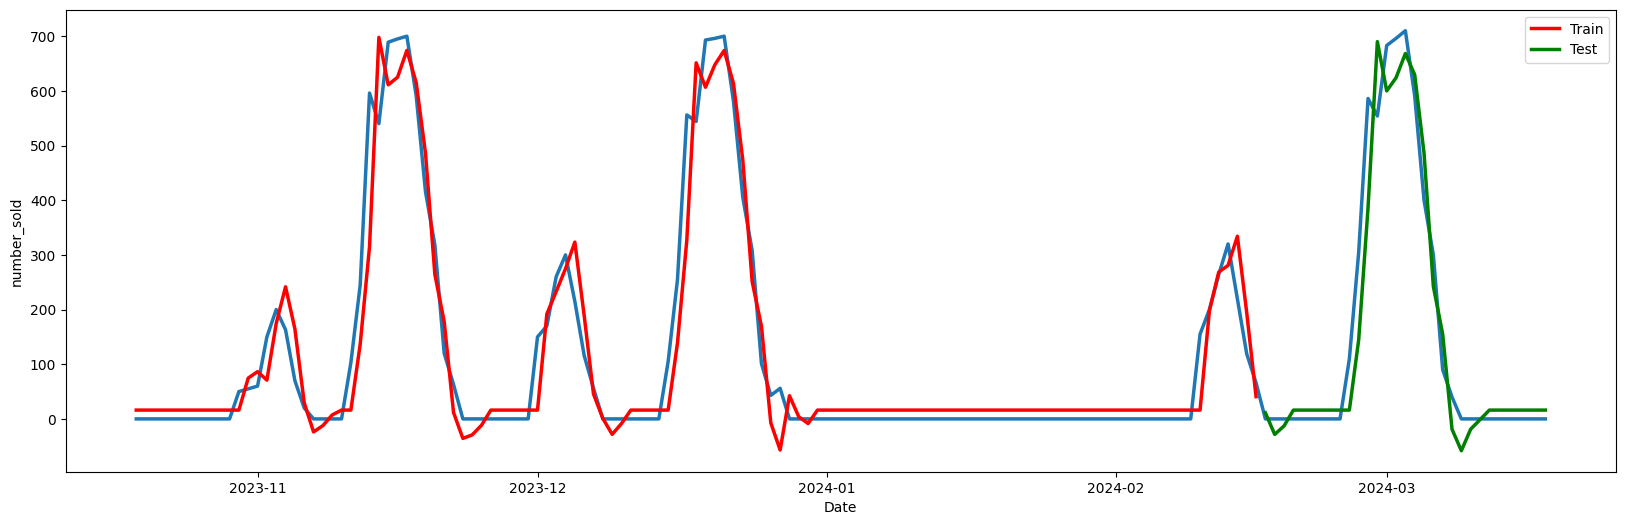

In [29]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=df["number_sold"], linewidth=2.5)
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")
sns.lineplot(x=X_test.index, y=test_predictions, color="green", linewidth=2.5, label="Test")

# Rekursive Ausgaben

In [33]:
X_train.iloc[-1:]

,lag_3,lag_2,lag_1
Date,,,
2024-02-16,320.0,219.0,119.0


In [34]:
y_train[-1]

66

In [36]:
import numpy as np

X_init = np.roll(X_train.iloc[-1:], -1)
X_init

array([[219., 119., 320.]])

In [37]:
X_init[0, -1] = y_train[-1]
X_init

array([[219., 119.,  66.]])

In [39]:
def make_predictions(trained_model, X_init, length):
  predictions = []
  for _ in range(length):
      y_pred = trained_model.predict(X_init)
      predictions.append(y_pred[0])
      X_init = np.roll(X_init, -1)
      X_init[0, -1] = y_pred[0]

  return predictions

In [42]:
import warnings

warnings.filterwarnings("ignore")

In [43]:
recursive_test_predictions = make_predictions(model, X_init, len(X_test))

In [45]:
recursive_mae = mean_absolute_error(recursive_test_predictions, y_test)
print("Mean Absolute Error:", recursive_mae)

Mean Absolute Error: 160.34156276119117


<Axes: xlabel='Date', ylabel='number_sold'>

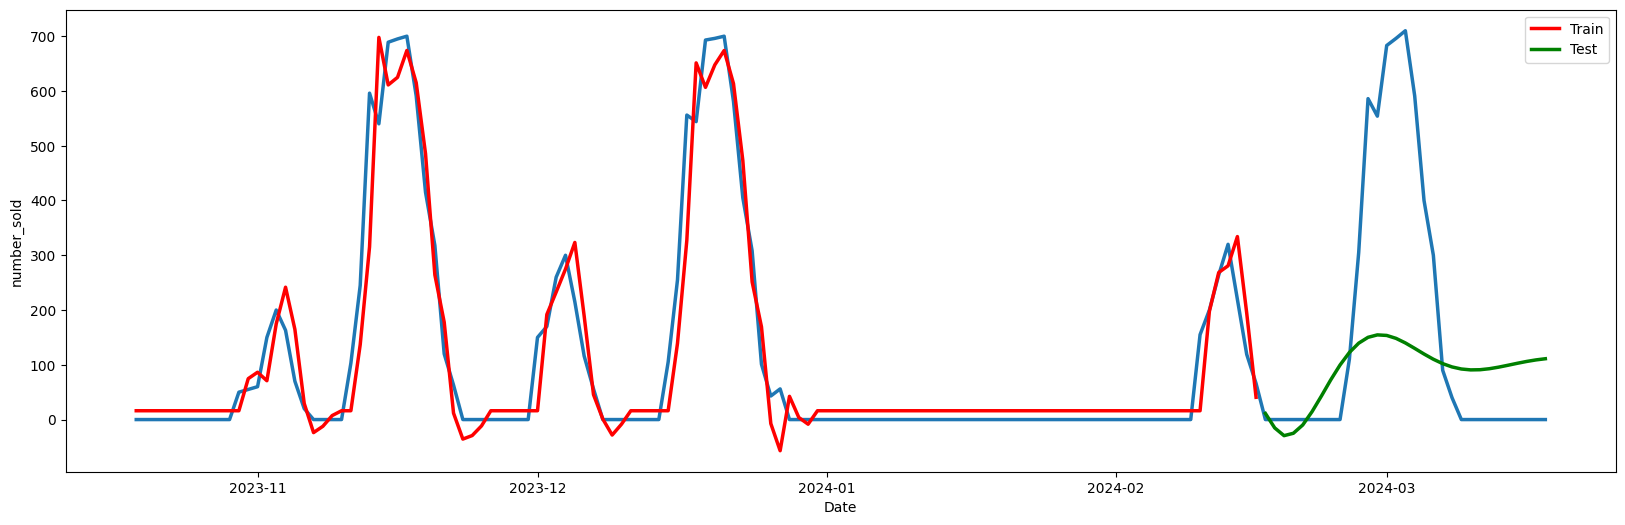

In [46]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=df["number_sold"], linewidth=2.5)
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")
sns.lineplot(x=X_test.index, y=recursive_test_predictions, color="green", linewidth=2.5, label="Test")

In [47]:
recursive_forecast_predictions = make_predictions(model, [recursive_test_predictions[-3:]], 30)
recursive_forecast_predictions

[112.40271306895104,
 112.98845738542197,
 112.90155955391259,
 112.27785807200694,
 111.27982833224691,
 110.07569176989146,
 108.82192033620532,
 107.65019961521462,
 106.65927803376955,
 105.91157192355531,
 105.4339570906932,
 105.22187696400344,
 105.24573865672538,
 105.45853988226527,
 105.80374977237614,
 106.22262685997947,
 106.66036703489006,
 107.07070336868503,
 107.41880229648264,
 107.68249625466753,
 107.85204753596537,
 107.9287445042401,
 107.92268817749611,
 107.85013836756369,
 107.73076161907007,
 107.58506796567846,
 107.43225075912505,
 107.2885639439457,
 107.16629328756107,
 107.07330944364202]

In [49]:
X_test.index

DatetimeIndex(['2024-02-17', '2024-02-18', '2024-02-19', '2024-02-20',
               '2024-02-21', '2024-02-22', '2024-02-23', '2024-02-24',
               '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01', '2024-03-02', '2024-03-03',
               '2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-09', '2024-03-10', '2024-03-11',
               '2024-03-12', '2024-03-13', '2024-03-14', '2024-03-15',
               '2024-03-16', '2024-03-17', '2024-03-18'],
              dtype='datetime64[ns]', name='Date', freq='D')

In [53]:
forecast_index = pd.date_range(start=X_test.index[-1], periods=31, freq='D')[1:]
forecast_index

DatetimeIndex(['2024-03-19', '2024-03-20', '2024-03-21', '2024-03-22',
               '2024-03-23', '2024-03-24', '2024-03-25', '2024-03-26',
               '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05', '2024-04-06', '2024-04-07',
               '2024-04-08', '2024-04-09', '2024-04-10', '2024-04-11',
               '2024-04-12', '2024-04-13', '2024-04-14', '2024-04-15',
               '2024-04-16', '2024-04-17'],
              dtype='datetime64[ns]', freq='D')

<Axes: xlabel='Date', ylabel='number_sold'>

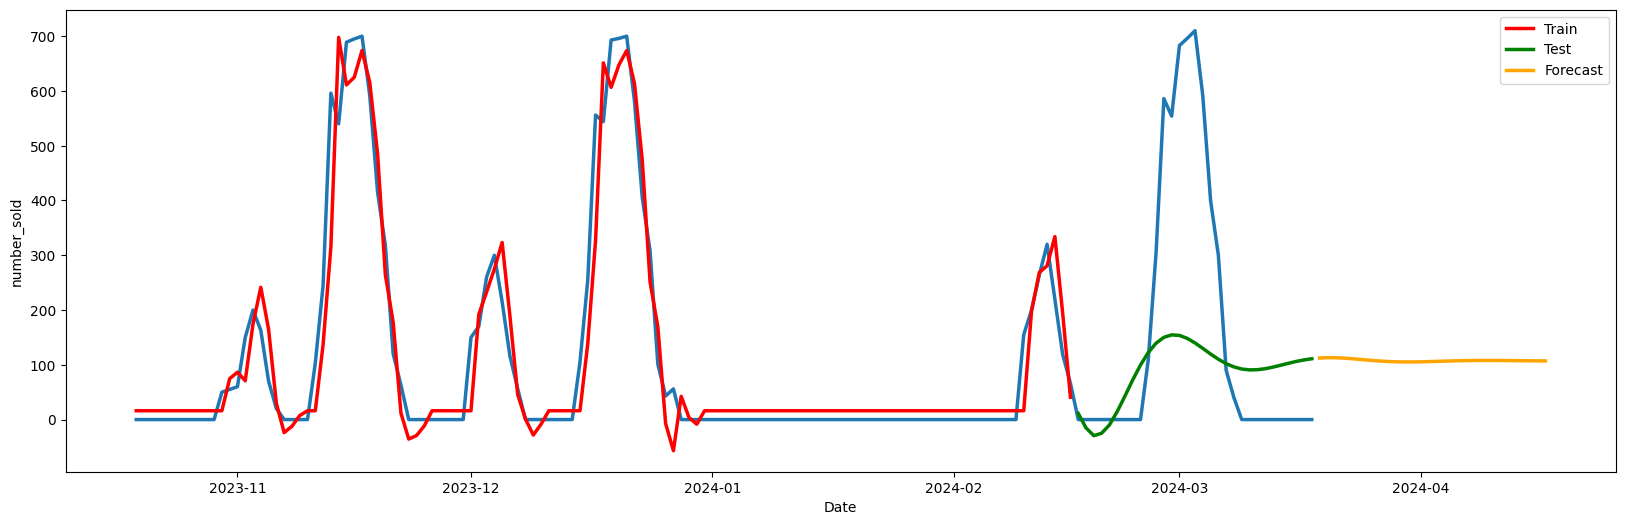

In [54]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=df["number_sold"], linewidth=2.5)
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")
sns.lineplot(x=X_test.index, y=recursive_test_predictions, color="green", linewidth=2.5, label="Test")
sns.lineplot(x=forecast_index, y=recursive_forecast_predictions, color="orange", linewidth=2.5, label="Forecast")

# Mehrfachausgaben

In [55]:
X

,lag_3,lag_2,lag_1
Date,,,
2023-10-19,0.0,0.0,0.0
2023-10-20,0.0,0.0,0.0
2023-10-21,0.0,0.0,0.0
2023-10-22,0.0,0.0,0.0
2023-10-23,0.0,0.0,0.0
...,...,...,...
2024-03-14,0.0,0.0,0.0
2024-03-15,0.0,0.0,0.0
2024-03-16,0.0,0.0,0.0


In [56]:
y

Date
2023-10-19    0
2023-10-20    0
2023-10-21    0
2023-10-22    0
2023-10-23    0
             ..
2024-03-14    0
2024-03-15    0
2024-03-16    0
2024-03-17    0
2024-03-18    0
Freq: D, Name: number_sold, Length: 152, dtype: int64

In [61]:
y_multioutput = pd.DataFrame({
    'y': y,
    'future_1': y.shift(-1),
    'future_2': y.shift(-2),
    'future_3': y.shift(-3),
    'future_4': y.shift(-4),
    'future_5': y.shift(-5),
    'future_6': y.shift(-6),
}).fillna(0)

y_multioutput

,y,future_1,future_2,future_3,future_4,future_5,future_6
Date,,,,,,,
2023-10-19,0,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-20,0,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-21,0,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-22,0,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-23,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-14,0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-15,0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-16,0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
y_multioutput_train = y_multioutput.loc[X_train.index]
y_multioutput_test = y_multioutput.loc[X_test.index]

In [63]:
multioutput_model = LinearRegression()
multioutput_model.fit(X_train, y_multioutput_train)

LinearRegression()

In [64]:
multioutput_train_predictions = multioutput_model.predict(X_train)
multioutput_train_predictions

array([[  16.12269649,   35.04665369,   58.65786972,   82.15912509,
         102.0187084 ,  118.99799192,  128.49980215],
       [  16.12269649,   35.04665369,   58.65786972,   82.15912509,
         102.0187084 ,  118.99799192,  128.49980215],
       [  16.12269649,   35.04665369,   58.65786972,   82.15912509,
         102.0187084 ,  118.99799192,  128.49980215],
       [  16.12269649,   35.04665369,   58.65786972,   82.15912509,
         102.0187084 ,  118.99799192,  128.49980215],
       [  16.12269649,   35.04665369,   58.65786972,   82.15912509,
         102.0187084 ,  118.99799192,  128.49980215],
       [  16.12269649,   35.04665369,   58.65786972,   82.15912509,
         102.0187084 ,  118.99799192,  128.49980215],
       [  16.12269649,   35.04665369,   58.65786972,   82.15912509,
         102.0187084 ,  118.99799192,  128.49980215],
       [  16.12269649,   35.04665369,   58.65786972,   82.15912509,
         102.0187084 ,  118.99799192,  128.49980215],
       [  16.12269649,  

In [65]:
multioutput_train_predictions.shape

(121, 7)

In [66]:
X_train.index

DatetimeIndex(['2023-10-19', '2023-10-20', '2023-10-21', '2023-10-22',
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-28',
               ...
               '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-10',
               '2024-02-11', '2024-02-12', '2024-02-13', '2024-02-14',
               '2024-02-15', '2024-02-16'],
              dtype='datetime64[ns]', name='Date', length=121, freq='D')

In [67]:
streched_train_index = pd.date_range(start=X_train.index[0], periods=len(X_train)+6, freq='D')
streched_train_index

DatetimeIndex(['2023-10-19', '2023-10-20', '2023-10-21', '2023-10-22',
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-28',
               ...
               '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
               '2024-02-17', '2024-02-18', '2024-02-19', '2024-02-20',
               '2024-02-21', '2024-02-22'],
              dtype='datetime64[ns]', length=127, freq='D')

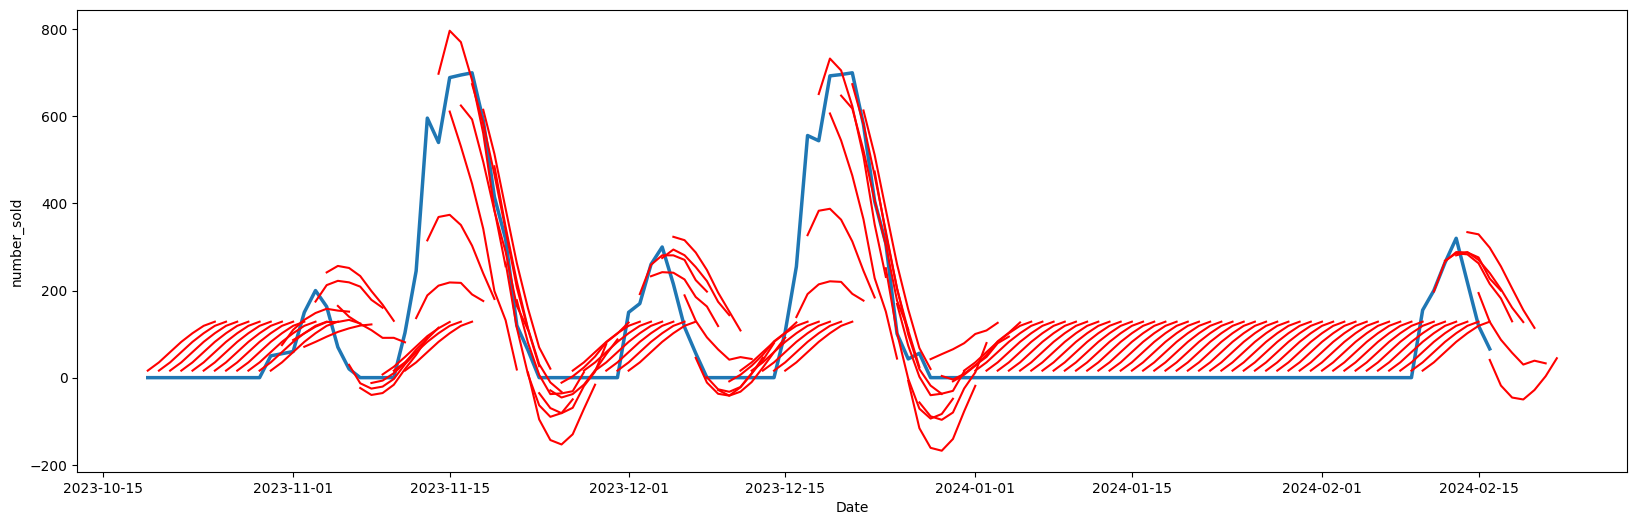

In [71]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=X_train.index, y=y_train, linewidth=2.5)

for i in range(len(X_train)):
    sns.lineplot(x=streched_train_index[i:i+7], y=multioutput_train_predictions[i, :], color="red")

In [68]:
streched_train_index[0:0+7]

DatetimeIndex(['2023-10-19', '2023-10-20', '2023-10-21', '2023-10-22',
               '2023-10-23', '2023-10-24', '2023-10-25'],
              dtype='datetime64[ns]', freq='D')

In [70]:
multioutput_train_predictions[0, :]

array([ 16.12269649,  35.04665369,  58.65786972,  82.15912509,
       102.0187084 , 118.99799192, 128.49980215])

In [78]:
multioutput_test_predictions = multioutput_model.predict(X_test)

In [79]:
multioutput_mae = mean_absolute_error(multioutput_test_predictions, y_multioutput_test)
print("Mean Absolute Error:", multioutput_mae)

Mean Absolute Error: 118.45354157695168


In [80]:
streched_test_index = pd.date_range(start=X_test.index[0], periods=len(X_test)+6, freq='D')

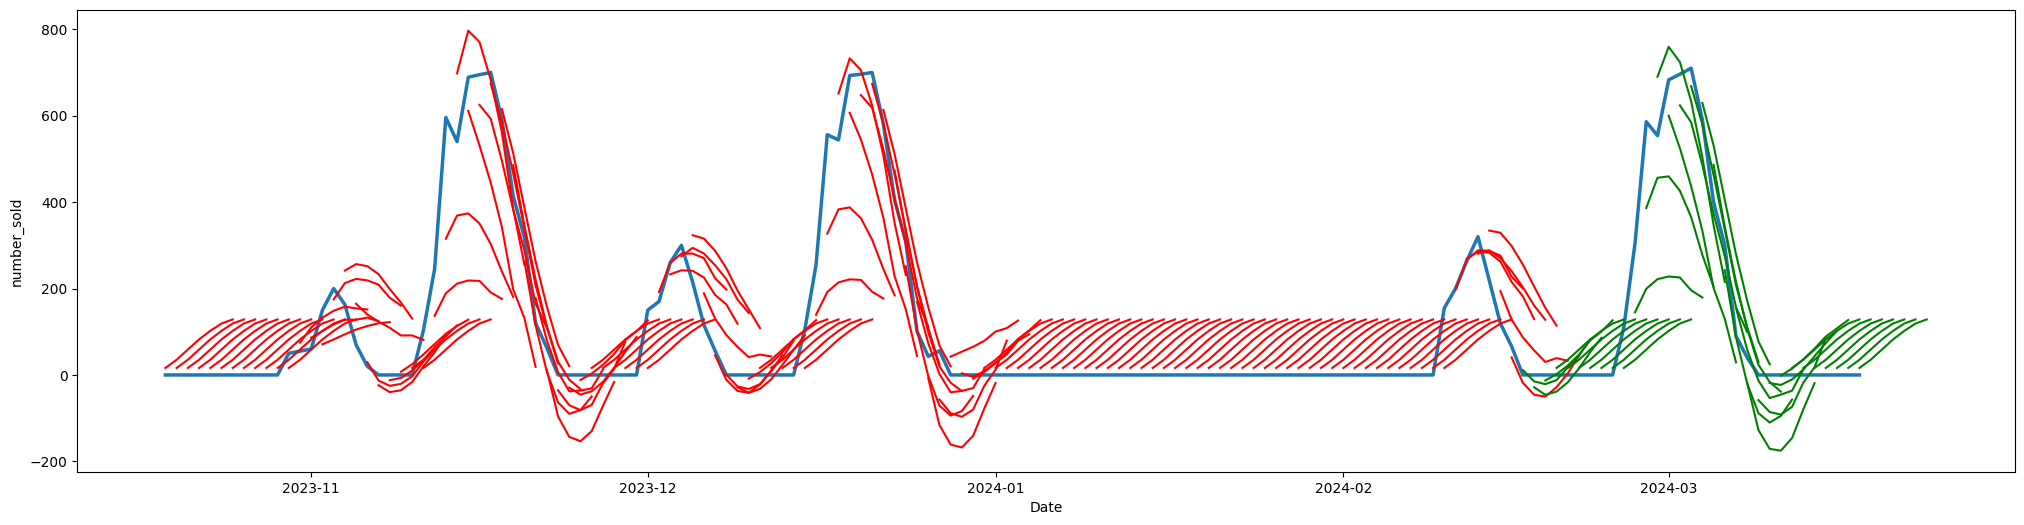

In [81]:
plt.figure(figsize=(25, 6))
sns.lineplot(x=X.index, y=y, linewidth=2.5)

for i in range(len(X_train)):
    sns.lineplot(x=streched_train_index[i:i+7], y=multioutput_train_predictions[i, :], color="red")

for i in range(len(X_test)):
    sns.lineplot(x=streched_test_index[i:i+7], y=multioutput_test_predictions[i, :], color="green")